In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/pre_processed_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699942 entries, 0 to 699941
Columns: 198 entries, Quantity Sold (kilo) to Sale or Return_sale
dtypes: bool(196), float64(2)
memory usage: 141.5 MB


In [4]:
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

x_train_tensor.shape, x_test_tensor.shape

2023-12-03 18:25:56.170003: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-03 18:25:56.170033: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-03 18:25:56.170046: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-03 18:25:56.170218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-03 18:25:56.170732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([664944, 197]), TensorShape([34998, 197]))

In [5]:
model = tf.keras.Sequential()

# Dense layers
model.add(tf.keras.layers.Dense(197, activation='relu', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

# LSTM layers
# Reshape for LSTM layer
model.add(tf.keras.layers.Reshape((1, 16))) 
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dropout(0.1))

# Output layer
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 10

history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_test_tensor, y_test_tensor))

Epoch 1/4


2023-12-03 18:27:41.433291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20780/20780 [==============================] - 524s 25ms/step - loss: 0.1617 - mae: 0.1617 - val_loss: 0.1337 - val_mae: 0.1337
Epoch 2/4
20780/20780 [==============================] - 537s 26ms/step - loss: 0.1315 - mae: 0.1315 - val_loss: 0.1299 - val_mae: 0.1299
Epoch 3/4
20780/20780 [==============================] - 573s 28ms/step - loss: 0.1285 - mae: 0.1285 - val_loss: 0.1302 - val_mae: 0.1302
Epoch 4/4
20780/20780 [==============================] - 673s 32ms/step - loss: 0.1273 - mae: 0.1273 - val_loss: 0.1305 - val_mae: 0.1305


NameError: name 't' is not defined

In [6]:
y_predictions = model.predict(x_test_tensor)
y_predictions[:5]

1094/1094 [==============================] - 5s 4ms/step


array([[0.09040096],
       [0.39945123],
       [0.4449484 ],
       [0.6064398 ],
       [0.621207  ]], dtype=float32)

In [11]:
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0.095, 0.621, 0.447, 1.163, 0.543], dtype=float32)>

In [7]:
model.evaluate(x_test_tensor, y_test_tensor)

1094/1094 [==============================] - 7s 7ms/step - loss: 0.1305 - mae: 0.1305


[0.13049113750457764, 0.13049113750457764]

Text(0, 0.5, 'loss')

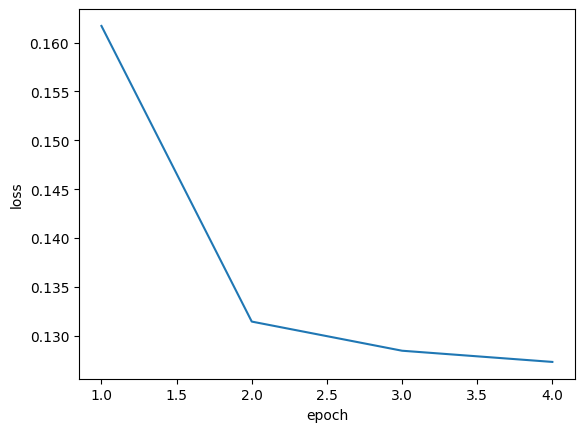

In [8]:
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')